# Mapping the tracks with water levels

This notebook show the way to map tracks with the water level information.

1. Mapping one track
2. Mapping multiple tracks

In later notebook, the temporal water level changes would be dealt.

## Setting

Required setting in the previous notebook.

In [1]:
import glob
import os
import pandas as pd
from pathlib import Path
import h5py
import re
import numpy as np

In [2]:
##### load files
## set the directory
data_home = Path('/home/jovyan/ICESat_water_level/extraction/download/')
## list them up and check them
files= list(data_home.glob('*.h5'))
## choose a file as an example
file_latest = files[37]

##### function of reading alt13
def alt13_to_df(filename, beam):    
    f = h5py.File(filename, 'r')
    f_beam = f[beam]
    lat = f_beam['segment_lat'][:]
    long = f_beam['segment_lon'][:]
    ws = f_beam['ht_water_surf'][:]
    ws_sd = f_beam['stdev_water_surf'][:]
    ws_err = f_beam['err_ht_water_surf'][:]
    ortho = f_beam['ht_ortho'][:]
    wd = f_beam['water_depth'][:]
    alt13_df = pd.DataFrame({'Latitude':lat,'Longitude':long,'SurfaceH':ws,
                            'SH_SD':ws_sd, 'SH_error':ws_err,'OrthoH':ortho,
                            'WaterD':wd})
    return alt13_df

Check whether it works well.

In [3]:
gt2r = alt13_to_df(file_latest,'gt2r')
print(gt2r)

      Latitude   Longitude   SurfaceH  SH_SD      SH_error    OrthoH  \
0    12.572414  104.233827 -15.095439  0.030  3.402823e+38  2.840535   
1    12.572625  104.233804 -15.091765  0.030  3.402823e+38  2.844710   
2    12.572881  104.233778 -15.077269  0.030  3.402823e+38  2.860193   
3    12.573246  104.233740 -15.074327  0.030  3.402823e+38  2.864084   
4    12.574486  104.233615 -15.103493  0.030  3.402823e+38  2.838326   
..         ...         ...        ...    ...           ...       ...   
337  12.952379  104.195111 -15.540386  0.025  3.402823e+38  3.131171   
338  12.952545  104.195094 -15.568451  0.025  3.402823e+38  3.103435   
339  12.953128  104.195033 -15.562346  0.025  3.402823e+38  3.110859   
340  12.954445  104.194900 -15.566502  0.025  3.402823e+38  3.109011   
341  12.954828  104.194861 -15.532722  0.025  3.402823e+38  3.143470   

           WaterD  
0    3.402823e+38  
1    3.402823e+38  
2    3.402823e+38  
3    3.402823e+38  
4    3.402823e+38  
..            .

## Step 1: Mapping one track with water level information

We will use `surface water hegiht` and `Orthometric height` as water level infromation.

### Showing the water level information.

In [4]:
print('Surface water height - Min. height:', gt2r['SurfaceH'].min(),'(m)', 'Max. height:', gt2r['SurfaceH'].max(),'(m)')
print('Orthometric height - Min. height:', gt2r['OrthoH'].min(),'(m)', 'Max. height:', gt2r['OrthoH'].max(),'(m)')

Surface water height - Min. height: -16.821245 (m) Max. height: -14.976893 (m)
Orthometric height - Min. height: 1.7828771 (m) Max. height: 3.4429538 (m)


In [5]:
import h5py
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl        
import cartopy.io.img_tiles as cimgt

In [6]:
### bounds of Tonle Sap Lake
sp_ex = [103.643, 104.667, 12.375, 13.287]

In [7]:
## function for mapping the water level 
def ic2_map_wl(file, beam, bound, water_levels):
    ic2 = alt13_to_df(file,beam)
    fig = plt.figure(figsize=(9,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bound, crs=ccrs.PlateCarree())
    plt.scatter(ic2['Longitude'], ic2['Latitude'], s=10, c=ic2[water_levels], alpha=.7, transform=ccrs.PlateCarree(), cmap='terrain')
    plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

    ##load Google Sat.Map
    #request = cimgt.GoogleTiles(style='satellite')
    request = cimgt.Stamen('terrain-background')
    ax.add_image(request, 7)

In [ ]:
ic2_map_wl(file_latest,'gt2r',sp_ex,'OrthoH')

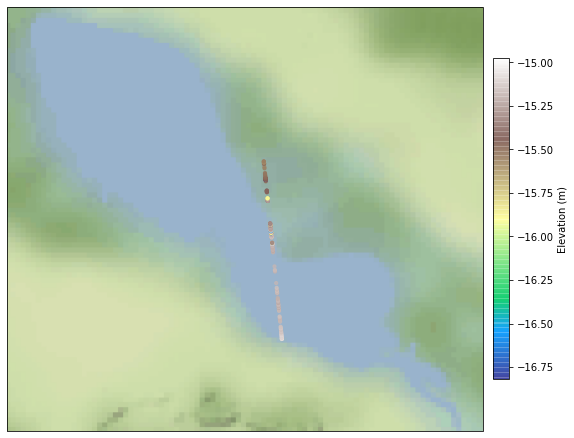

In [8]:
ic2_map_wl(file_latest,'gt2r',sp_ex,'SurfaceH')

### Showing water level for all beams

In [ ]:
## function for mapping the water level from every beam
def ic2_map_wl_beams(file, bound, water_levels):
    fig = plt.figure(figsize=(9,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bound, crs=ccrs.PlateCarree())
    beam = ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']
    for i in beam:
        ic2 = alt13_to_df(file,i)
        plt.scatter(ic2['Longitude'], ic2['Latitude'], s=10, c=ic2[water_levels], alpha=.7, transform=ccrs.PlateCarree(), cmap='terrain')
    plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

    ##load Google Sat.Map
    #request = cimgt.GoogleTiles(style='satellite')
    request = cimgt.Stamen('terrain-background')
    ax.add_image(request, 7)

In [ ]:
ic2_map_wl_beams(file_latest,sp_ex,'OrthoH')

In [ ]:
ic2_map_wl_beams(file_latest,sp_ex,'SurfaceH')

## Step 2: Mapping multiple tracks with water level information

### Mapping the tracks

Let's see the multiple repeat track around Tonle Sap Lake.

In [ ]:
## list
# print(files)

D_dict={}
error_count=0
for ff in files:
    try:
        D_dict[ff]=alt13_to_df(ff, 'gt2l')
    except KeyError as e:
        print(f'file {ff} encountered error {e}')
        error_count += 1
print(f"read {len(D_dict)} data files of which {error_count} gave errors")

There are 37 files with 'gt2l' among 38 files. 

In [ ]:
fig = plt.figure(figsize=(9,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(sp_ex, crs=ccrs.PlateCarree())
for index,Di in D_dict.items():
    plt.scatter(Di['Longitude'], Di['Latitude'],s=2)

request = cimgt.Stamen('terrain-background')
ax.add_image(request, 10)
plt.title("Tracks of gt2l on TSL")

Mapping all tracks with all beams

In [ ]:
### new dictionaries for collecting all beams in files
D_dict_beams={}
error_count=0
beam = ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']
for fff in files:
    for bb in beam:
        try:
            D_dict_beams[str(fff)+'_'+str(bb)]=alt13_to_df(fff, bb)
        except KeyError as e:
            print(f'file {fff} encountered error {e}')
            error_count += 1
print(f"read {len(D_dict_beams)} data files of which {error_count} gave errors")

In [ ]:
fig = plt.figure(figsize=(9,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(sp_ex, crs=ccrs.PlateCarree())
for index,Di in D_dict_beams.items():
    plt.scatter(Di['Longitude'], Di['Latitude'],s=2)

request = cimgt.Stamen('terrain-background')
ax.add_image(request, 10)
plt.title("Tracks on TSL")

### Mapping with water levels

It is a function for mapping water level of all ICESat-2 on the TSL

In [ ]:
def ic2_map_wl_beams_all(dic, bound, water_levels,title):
    fig = plt.figure(figsize=(9,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bound, crs=ccrs.PlateCarree())
    for index,Di in dic.items():
        plt.scatter(Di['Longitude'], Di['Latitude'],s=2,c=Di[water_levels], alpha=.7)
   
    request = cimgt.Stamen('terrain-background')
    ax.add_image(request, 10)
    plt.title(title)
    plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

#### water levels = Surface water height

In [ ]:
ic2_map_wl_beams_all(D_dict,sp_ex,'SurfaceH',"Tracks of gt2l on TSL: Surface water height")

See water levels of all beams of all tracks

In [ ]:
ic2_map_wl_beams_all(D_dict_beams,sp_ex,'SurfaceH',"All tracks of all beams on TSL: Surface water height")

#### water levels = SOrthometric height

In [ ]:
ic2_map_wl_beams_all(D_dict,sp_ex,'OrthoH',"Tracks of gt2l on TSL: Orthometric height")

In [ ]:
ic2_map_wl_beams_all(D_dict_beams,sp_ex,'OrthoH',"Tracks of gt2l on TSL: Orthometric height")